# Деревья решений

# 1. Деревья решений в sklearn

## 1.1 Demo: Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score

%matplotlib inline

Набор данных - Ирисы Фишера (Андерсона)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data[:, 2:] # petal length and width
target_names = iris.target_names
feature_names = iris.feature_names[2:]

y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 1.2 Demo: Деревья. Классификация

 Task<br>
 Задание: постройте и визуализируйте структуру решающего дерева
 для критерия разбиения “entropy"

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# criterion: “gini”, “entropy”, “log_loss”. default=”gini”
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=2, random_state=42)
tree_clf_gini.fit(X, y)

# criterion: "entropy"
tree_clf_entropy = DecisionTreeClassifier(
    criterion='entropy', max_depth=2,random_state=42)
tree_clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

###Структура дерева с критерием Entropy

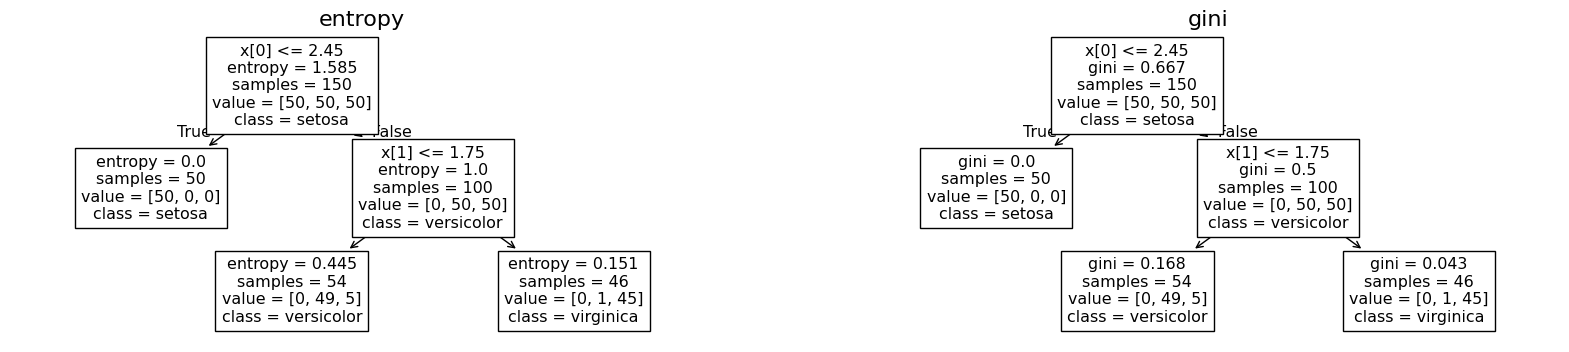

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(121)
tree.plot_tree(tree_clf_entropy, class_names=iris.target_names)
plt.title("entropy", fontsize=16)

plt.subplot(122)
tree.plot_tree(tree_clf_gini, class_names = iris.target_names)
plt.title("gini", fontsize=16)

plt.show()

## 1.6 Прикладная задача: предсказание времени задержки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/AIM_WORK/Lab6/departure-delayed (1).zip', 'r') as zips:
    zips.extractall(path="data/")

In [ ]:
train = pd.read_csv('./data/departure-delayed/train_features.csv').fillna(0)
# test = pd.read_csv('./departure-delayed/test_features.csv').fillna(0)

In [ ]:
y = pd.read_csv('./data/departure-delayed/train_target.csv', index_col='id')

In [ ]:
y[:5]

,DelayTime
id,
0,15.0
1,40.0
2,31.0
3,71.0
4,15.0


Размеры выборок

In [ ]:
train.shape, y.shape

((1355730, 13), (1355730, 1))

Посмотрим как выглядят данные

In [ ]:
train.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,4,23,3,700,907,US,1195,N119US,307.0,PHL,PHX,2075
1,2008,7,18,5,2154,2349,US,401,N637AW,115.0,PHX,SFO,651
2,2008,12,21,7,1921,1949,NW,1767,N782NC,88.0,DTW,MSN,312
3,2008,4,24,4,1955,2020,WN,1865,N272WN,145.0,SAT,PHX,843
4,2008,6,27,5,1700,1848,OH,5186,N804CA,108.0,ORF,CVG,485


Для начала, мы рассмотрим переменные, заданные числами

In [ ]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance
count,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06
mean,2008.0,6.110740e+00,1.574999e+01,3.983747e+00,1.467329e+03,1.634319e+03,2.184460e+03,1.342627e+02,7.655388e+02
std,0.0,3.483056e+00,8.777616e+00,1.996024e+00,4.248367e+02,4.644701e+02,1.944718e+03,7.133404e+01,5.745182e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.200000e+01,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,8.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,1.160000e+02,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.015000e+03,3.422000e+03,1.650000e+02,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.741000e+03,6.600000e+02,4.962000e+03


In [ ]:
# Проверим, прежде чем выкидывать признак:
print("Значений признака 'year' в трейне " ,  train['Year'].nunique())
# print("Значений признака 'year' в тесте " ,  test['Year'].nunique())

Значений признака 'year' в трейне  1


Итак, какие выводы мы можем сделать?
1. Признак `year` не несет вариативности в данные - удалим его
2. Признаки `Month`, `DayofMonth`, `DayOfWeek` скорее всего можно рассматривать как категориальные

In [ ]:
train.drop('Year', axis=1, inplace=True)
# test.drop('Year', axis=1, inplace=True)

In [ ]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)
types

,0
Month,int64
DayofMonth,int64
DayOfWeek,int64
CRSDepTime,int64
CRSArrTime,int64
UniqueCarrier,object
FlightNum,int64
TailNum,object
CRSElapsedTime,float64
Origin,object


##### Разделение тренировочной выборки на тренировочную и валидационную

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor()
dt.fit(x_train[real_cols], y_train)
mse_train = mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
mse_val = mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
print(mse_train, mse_val)

0.0 43.444295693095235


###Регуляризация дерева: по глубине и количеству экземпляру в листьях

In [ ]:
mse_train = []
mse_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

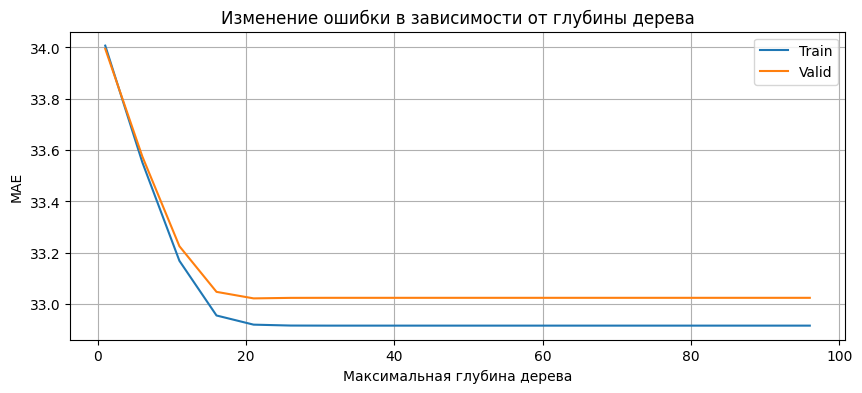

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

###Обучение моделей без регуляризации по мин. кол-ву экземпляров в листе

Обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.<br>
Визуализируйте MAE

In [ ]:
# обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.
# визуализируйте MAE

In [ ]:
mae_train_without_min_samples_leaf = []
mae_val_without_min_samples_leaf = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1)
    dt.fit(x_train[real_cols], y_train)
    mae_train_without_min_samples_leaf = np.append(
        mae_train_without_min_samples_leaf,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )
    mae_val_without_min_samples_leaf = np.append(
        mae_val_without_min_samples_leaf,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

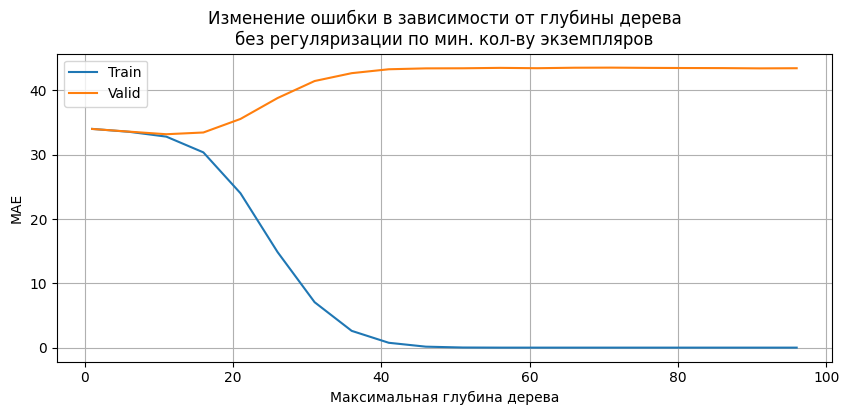

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева\nбез регуляризации по мин. кол-ву экземпляров')

plt.plot([i*5 + 1 for i in range(20)], mae_train_without_min_samples_leaf, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mae_val_without_min_samples_leaf, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

При отсутсвии регуляризации по мин. кол-ву экземпляров MAE для тренировчной и тестовой выборки сильно расходится с увеличением глубины дерева, и MAE тренировочной выборки достигает нуля (переобучение)

Обучение классификаторов c регуляризацией по мин. кол-ву экземпляров в листе

In [ ]:
min_samples_leafs_mae_train = []
min_samples_leafs_mae_val = []

for i in range(1000, 1, -100):
    dt = DecisionTreeRegressor(min_samples_leaf=i)
    dt.fit(x_train[real_cols], y_train)

    min_samples_leafs_mae_train = np.append(
        min_samples_leafs_mae_train,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )

    min_samples_leafs_mae_val = np.append(
        min_samples_leafs_mae_val,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

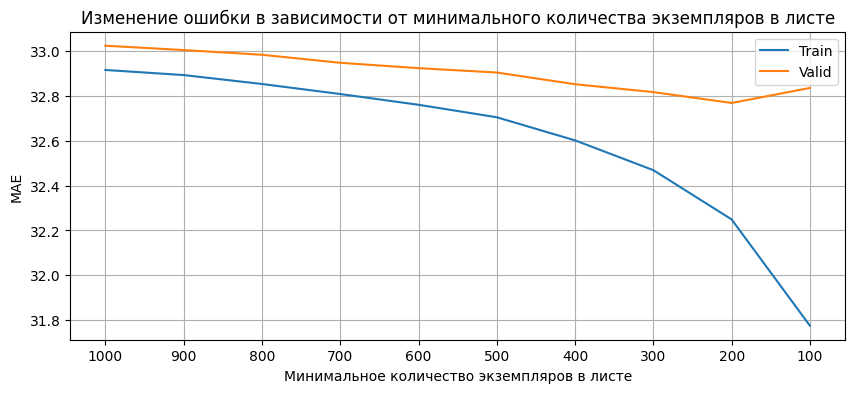

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от минимального количества экземпляров в листе')
plot_x = [i for i in range(len(min_samples_leafs_mae_train))]
plt.plot(plot_x, min_samples_leafs_mae_train, label='Train')
plt.plot(plot_x, min_samples_leafs_mae_val, label='Valid')
plt.xticks(plot_x, range(1000, 1, -100))
plt.legend()
plt.xlabel('Минимальное количество экземпляров в листе')
plt.ylabel('MAE')
plt.grid()
plt.show()

###Дерево с наилучшими параметрами максимальной глубины и мин. кол-ва экземпляров в листе

In [ ]:
# обучите дерево с наилучшими параметрами из предыдущего примера
best_dt = DecisionTreeRegressor(max_depth=21, min_samples_leaf=1000)
best_dt.fit(x_train[real_cols], y_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=1000)

In [ ]:
parameters = {'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [500, 400, 300, 200]}
dt_model = DecisionTreeRegressor()
dt_cv = GridSearchCV(dt_model, parameters, n_jobs=-1, scoring="neg_mean_absolute_error")
dt_cv.fit(x_train[real_cols], y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [500, 400, 300, 200]},
             scoring='neg_mean_absolute_error')

Параметры и значения ошибки MAE

In [ ]:
print('best params: ', dt_cv.best_params_)

mse_train = mean_absolute_error(dt_cv.predict(x_train[real_cols]), y_train)
mse_val = mean_absolute_error(dt_cv.predict(x_val[real_cols]), y_val)
print('mae train =', np.round(mse_train, 2))
print('mae test =', np.round(mse_val, 2))

best params:  {'max_depth': 20, 'min_samples_leaf': 200}
mae train = 32.33
mae test = 32.78


# 2. Ансамбли


## 2.2 Bagging

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [ ]:
bag_of_trees = BaggingRegressor(best_dt, n_estimators=5, random_state=42)

In [ ]:
bag_of_trees.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=21,
                                                 min_samples_leaf=1000),
                 n_estimators=5, random_state=42)

In [ ]:
bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
bag_mse_val

33.02407774271013

In [ ]:
bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
bag_mse_train

32.94950889166761

### Подбор параметров для бэггинга

In [ ]:
# Задача: выбрать оптимальное количество регрессоров, оптимальные параметры для Bagging Regressor
# Выбрать оптимальные параметры для каждого дерева.

In [ ]:
bagging_mae_train = []
bagging_mae_val = []

for i in [5, 10, 15, 20, 30, 50, 75, 100]:
    dt = BaggingRegressor(
        DecisionTreeRegressor(max_depth=20, min_samples_leaf=200),
        n_estimators=i,
        n_jobs=-1,
        random_state=42
        )
    dt.fit(x_train[real_cols], y_train)

    bagging_mae_train = np.append(
        bagging_mae_train,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )

    bagging_mae_val = np.append(
        bagging_mae_val,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

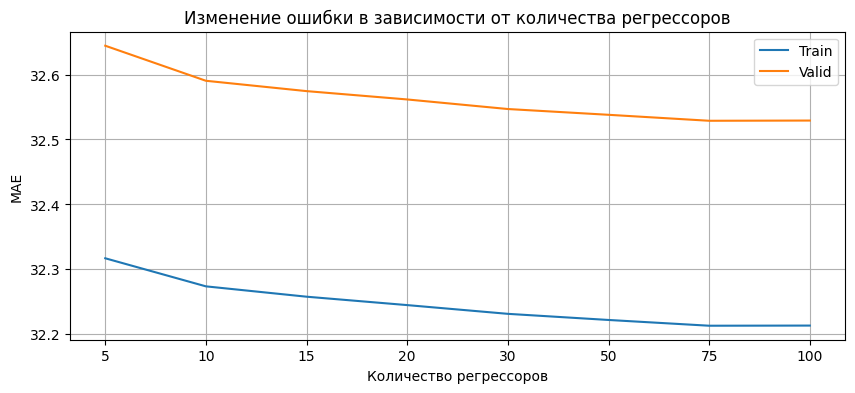

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от количества регрессоров')
plot_x = [i for i in range(len(bagging_mae_train))]
plt.plot(plot_x, bagging_mae_train, label='Train')
plt.plot(plot_x, bagging_mae_val, label='Valid')
plt.xticks(plot_x, [5, 10, 15, 20, 30, 50, 75, 100])
plt.legend()
plt.xlabel('Количество регрессоров')
plt.ylabel('MAE')
plt.grid()
plt.show()

### MAE для Бэггинг
с n_estimators=30<br>
и с max_depth и min_samples_leaf из предыдущей задачи

In [ ]:
bagging_dt = BaggingRegressor(DecisionTreeRegressor(max_depth=20, min_samples_leaf=200), n_estimators=30, random_state=42)
bagging_dt.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                 min_samples_leaf=200),
                 n_estimators=30, random_state=42)

In [ ]:
bdt_mae_val = mean_absolute_error(bagging_dt.predict(x_val[real_cols]), y_val)
bdt_mae_train = mean_absolute_error(bagging_dt.predict(x_train[real_cols]), y_train)

print('test mae =', np.round(bdt_mae_val, 4))
print('train mae =', np.round(bdt_mae_train, 4))

test mae = 32.547
train mae = 32.231


## 2.3 Random Forest

In [ ]:
# Задача: обучить, выявить оптимальное количество моделей в регрессоре, оптимальные параметры для регрессора
forest = RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=9)
forest.fit(x_train[real_cols], y_train)
rf_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
rf_mse_val

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


33.21772406454778

###Оптимальное количество моделей

In [ ]:
forest_mae_train = []
forest_mae_val = []

for i in range(5, 41, 5):
    dt = RandomForestRegressor(
        n_estimators=i,
        n_jobs=-1,
        random_state=42,
        criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    forest_mae_train = np.append(
        forest_mae_train,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )

    forest_mae_val = np.append(
        forest_mae_val,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

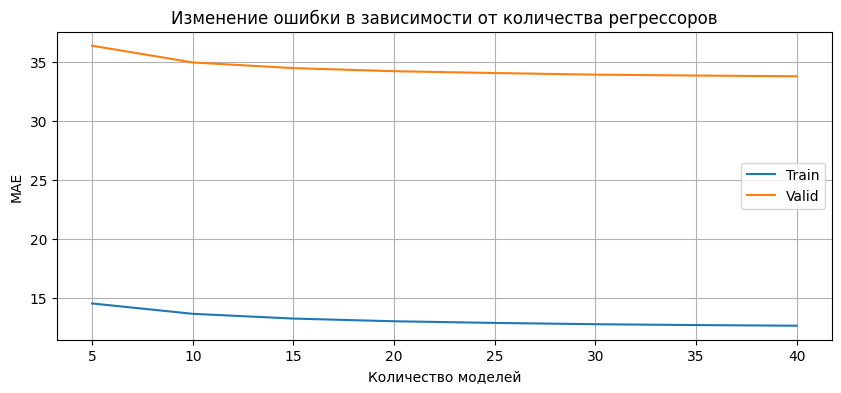

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от количества регрессоров')
plot_x = [i for i in range(len(forest_mae_train))]
plt.plot(plot_x, forest_mae_train, label='Train')
plt.plot(plot_x, forest_mae_val, label='Valid')
plt.xticks(plot_x, range(5, 41, 5))
plt.legend()
plt.xlabel('Количество моделей')
plt.ylabel('MAE')
plt.grid()
plt.show()

Оставим количество моделей = 10

###Параметр максимальной глубины дерева

In [ ]:
forest_max_depth_mae_train = []
forest_max_depth_mae_val = []

for i in range(1, 35, 5):
    dt = RandomForestRegressor(
        n_estimators=10,
        max_depth=i,
        n_jobs=-1,
        random_state=42,
        criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    forest_max_depth_mae_train = np.append(
        forest_max_depth_mae_train,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )

    forest_max_depth_mae_val = np.append(
        forest_max_depth_mae_val,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

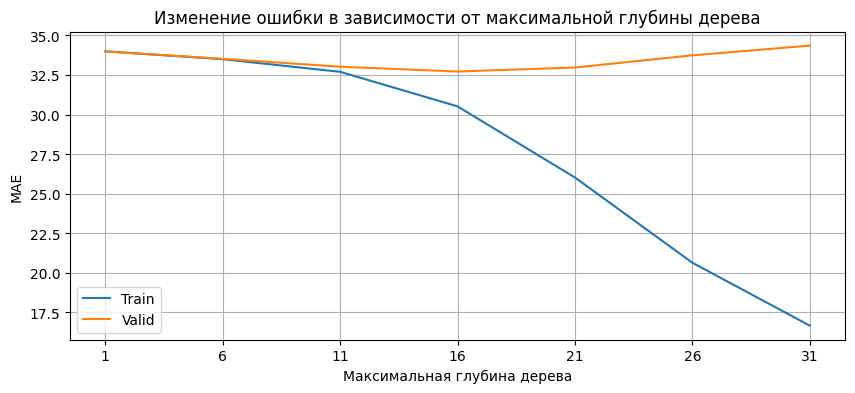

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от максимальной глубины дерева')
plot_x = [i for i in range(len(forest_max_depth_mae_train))]
plt.plot(plot_x, forest_max_depth_mae_train, label='Train')
plt.plot(plot_x, forest_max_depth_mae_val, label='Valid')
plt.xticks(plot_x, range(1, 35, 5))
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

Оставим значения 5, 10, 15

###Параметр количества экземпляров в листьях дерева

In [ ]:
forest_msl_depth_mae_train = []
forest_msl_depth_mae_val = []

for i in range(1000, 0, -100):
    dt = RandomForestRegressor(
        n_estimators=10,
        min_samples_leaf=i,
        n_jobs=-1,
        random_state=42,
        criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    forest_msl_depth_mae_train = np.append(
        forest_msl_depth_mae_train,
        mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
        )

    forest_msl_depth_mae_val = np.append(
        forest_msl_depth_mae_val,
        mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
        )

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

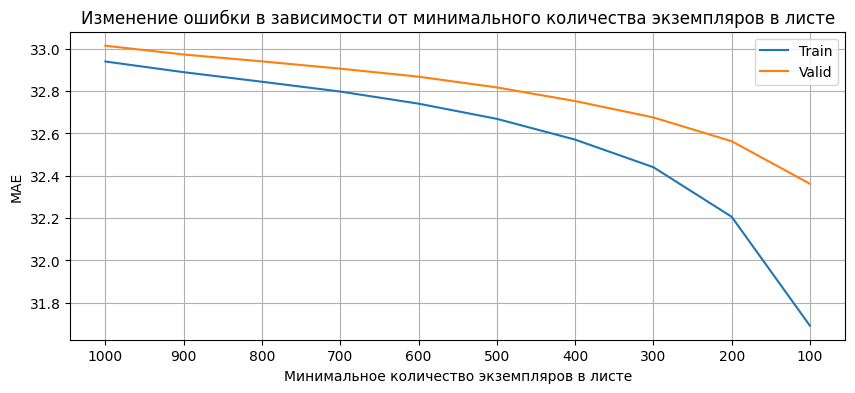

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от минимального количества экземпляров в листе')
plot_x = [i for i in range(len(forest_msl_depth_mae_train))]
plt.plot(plot_x, forest_msl_depth_mae_train, label='Train')
plt.plot(plot_x, forest_msl_depth_mae_val, label='Valid')
plt.xticks(plot_x, range(1000, 0, -100))
plt.legend()
plt.xlabel('Минимальное количество экземпляров в листе')
plt.ylabel('MAE')
plt.grid()
plt.show()

Проверим значения от 200 до 500

###Построение RandomForestRegressor с оптимальными параметрами кол-ва моделей, максимальной глубины дерева, минимального кол-ва экземпляров в листьях

In [ ]:
forest_parameters = {'max_depth': [5, 10, 15], 'min_samples_leaf': [500, 400, 300, 200]}
forest_model = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)
forest_cv = GridSearchCV(forest_model, forest_parameters, n_jobs=-1, scoring="neg_mean_absolute_error")
forest_cv.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [500, 400, 300, 200]},
             scoring='neg_mean_absolute_error')

Параметры и значения ошибки MAE

In [ ]:
print('best params: ', forest_cv.best_params_)

forest_mae_train = mean_absolute_error(forest_cv.predict(x_train[real_cols]), y_train)
forest_mae_val = mean_absolute_error(forest_cv.predict(x_val[real_cols]), y_val)
print('mae train =', np.round(forest_mae_train, 4))
print('mae test =', np.round(forest_mae_val, 4))

best params:  {'max_depth': 15, 'min_samples_leaf': 200}
mae train = 32.5322
mae test = 32.747
